In [1]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [4]:
rt = pandas.read_pickle("../output/raw_trades.pickle")
# rt = rt[(rt['parameter_target'] == 1) & (rt['distance'] >= 0.05)]
rt2 = rt[(rt['parameter_target'] == 1) & (rt['parameter_buffer'] == 0.0) & (rt['parameter_stop'] == 0.5) & (rt['distance'] >= 0.05)]

FileNotFoundError: [Errno 2] No such file or directory: '../output/raw_trades.pickle'

In [34]:
old = pandas.read_pickle("../raw_trades_LEGACY.pickle")
old2 = old[(old['parameter_target'] == 1) & (old['parameter_buffer'] == 0.0) & (old['parameter_stop'] == 0.5) & (old['distance'] >= 0.05)]

In [35]:
# rt2 = rt[(rt['parameter_target'] == 1) & (rt['parameter_buffer'] == 0.1) & (rt['parameter_stop'] == 0.2) & (rt['distance'] >= 0.05)]

In [36]:
rt.sort_values(by='max_r', ascending=False).head(10)

,parameter_buffer,parameter_stop,parameter_target,target_r,distance,direction,date,entry_price,entry_order_price,exit_price,stop_hit,target_hit,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_distance,max_r,theoretical_r,r
83573,0.7,0.2,3.1,15.5,0.07,short,2022-12-13,410.28,410.27,407.18,False,True,False,407.18,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,15.45,15.5
83558,0.7,0.2,1.6,8.0,0.07,short,2022-12-13,410.28,410.27,408.68,False,True,False,408.68,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,7.95,8.0
83570,0.7,0.2,2.8,14.0,0.07,short,2022-12-13,410.28,410.27,407.48,False,True,False,407.48,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,13.95,14.0
83569,0.7,0.2,2.7,13.5,0.07,short,2022-12-13,410.28,410.27,407.58,False,True,False,407.58,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,13.45,13.5
83568,0.7,0.2,2.6,13.0,0.07,short,2022-12-13,410.28,410.27,407.68,False,True,False,407.68,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,12.95,13.0
83567,0.7,0.2,2.5,12.5,0.07,short,2022-12-13,410.28,410.27,407.78,False,True,False,407.78,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,12.45,12.5
83566,0.7,0.2,2.4,12.0,0.07,short,2022-12-13,410.28,410.27,407.88,False,True,False,407.88,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,11.95,12.0
83565,0.7,0.2,2.3,11.5,0.07,short,2022-12-13,410.28,410.27,407.98,False,True,False,407.98,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,11.45,11.5
83564,0.7,0.2,2.2,11.0,0.07,short,2022-12-13,410.28,410.27,408.08,False,True,False,408.08,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,10.95,11.0
83563,0.7,0.2,2.1,10.5,0.07,short,2022-12-13,410.28,410.27,408.18,False,True,False,408.18,410.48,399.08,2022-12-13 14:30:00.011670016+00:00,2022-12-13 17:51:03.222944+00:00,11.2,56.0,10.45,10.5


In [37]:
old.sort_values(by='max_r', ascending=False).head(10)

,date,parameter_min_distance,parameter_stop,parameter_buffer,parameter_target,direction,trade_number,short_trade_number,long_trade_number,entry_price,exit_price,max_target_exit_price,stop_price,target_price,max_target,entry_time,exit_time,max_target_exit_time,distance,last_trade_price,time_close,trade_closed,stop_loss_triggered,max_r,r
1309,2022-12-14,0.05,0.5,0.0,1,short,2,2,0,404.93,403.93,396.32,405.43,403.93,8.61,16:03:50,17:00:44,19:35:01,3.325,399.41,False,True,False,17.220000,2.000000
1321,2022-12-14,0.05,0.6,0.0,1,short,2,2,0,404.93,403.93,396.32,405.53,403.93,8.61,16:03:50,17:00:44,19:35:01,3.325,399.41,False,True,False,14.350000,1.666667
1311,2022-12-14,0.05,0.5,0.1,1,short,2,2,0,404.83,403.93,396.32,405.43,403.93,8.61,16:03:45,17:00:44,19:35:01,3.225,399.41,False,True,False,14.183333,1.500000
912,2022-12-12,0.05,0.2,0.2,1,long,1,0,1,393.48,394.28,398.93,393.08,394.28,5.65,14:39:13,14:49:02,20:59:59,0.630,398.91,False,True,False,13.625000,2.000000
1063,2022-12-13,0.05,0.2,0.7,1,short,1,1,0,410.27,409.97,399.08,411.17,409.97,11.89,14:30:00,14:30:02,17:51:03,0.065,401.96,False,True,False,12.433333,0.333333
1056,2022-12-13,0.05,0.2,0.0,1,long,1,0,1,407.58,408.58,410.06,407.38,408.58,2.48,14:37:30,14:43:44,14:55:10,2.625,401.95,False,True,True,12.400000,5.000000
1333,2022-12-14,0.05,0.7,0.0,1,short,2,2,0,404.93,403.93,396.32,405.63,403.93,8.61,16:03:50,17:00:44,19:35:01,3.325,399.41,False,True,False,12.300000,1.428571
1323,2022-12-14,0.05,0.6,0.1,1,short,2,2,0,404.83,403.93,396.32,405.53,403.93,8.61,16:03:45,17:00:44,19:35:01,3.225,399.41,False,True,False,12.157143,1.285714
1313,2022-12-14,0.05,0.5,0.2,1,short,2,2,0,404.73,403.93,396.32,405.43,403.93,8.61,16:03:32,17:00:44,19:35:01,3.125,399.41,False,True,False,12.014286,1.142857
1072,2022-12-13,0.05,0.3,0.7,1,short,1,1,0,410.27,409.97,399.08,411.27,409.97,11.89,14:30:00,14:30:02,17:51:03,0.065,401.96,False,True,False,11.190000,0.300000


In [38]:
rt2.shape[0]

8

In [39]:
old2.shape[0]

7

In [40]:
old2[['parameter_buffer', 'parameter_stop', 'parameter_target',
       'distance', 'direction', 'date', 'entry_price',
       'exit_price', 'time_close', 'target_price',
       'stop_price', 'max_target_exit_price', 'entry_time',
       'max_target_exit_time', 'max_r', 'r']].sort_values(by='entry_price', ascending=False).head(20)

,parameter_buffer,parameter_stop,parameter_target,distance,direction,date,entry_price,exit_price,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_r,r
1083,0.0,0.5,1,2.625,long,2022-12-13,407.58,408.58,False,408.58,407.08,410.06,14:37:30,14:55:10,4.96,2.0
1309,0.0,0.5,1,3.325,short,2022-12-14,404.93,403.93,False,403.93,405.43,396.32,16:03:50,19:35:01,17.22,2.0
21,0.0,0.5,1,0.690,short,2022-12-02,402.91,403.41,False,401.91,403.41,402.67,14:30:19,14:31:06,0.48,-1.0
1308,0.0,0.5,1,0.365,short,2022-12-14,401.97,402.47,False,400.97,402.47,401.74,14:30:06,14:31:58,0.46,-1.0
186,0.0,0.5,1,0.605,long,2022-12-06,398.83,398.33,False,399.83,398.33,398.86,14:42:13,14:42:14,0.06,-1.0
744,0.0,0.5,1,1.285,short,2022-12-09,396.24,396.75,False,395.24,396.74,396.23,14:44:29,14:44:29,0.02,-1.0
348,0.0,0.5,1,0.910,short,2022-12-07,393.83,394.34,False,392.83,394.33,393.68,14:33:39,14:33:47,0.30,-1.0


In [41]:
rt2[['parameter_buffer', 'parameter_stop', 'parameter_target',
       'distance', 'direction', 'date', 'entry_order_price',
       'exit_price', 'time_close', 'target_price',
       'stop_price', 'max_target_exit_price', 'entry_time',
       'max_target_exit_time', 'max_r', 'r']].sort_values(by='entry_order_price', ascending=False).head(20)

,parameter_buffer,parameter_stop,parameter_target,distance,direction,date,entry_order_price,exit_price,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_r,r
73817,0.0,0.5,1.0,2.62,long,2022-12-13,407.58,408.58,False,408.58,407.08,410.06,2022-12-13 14:37:30.107087872+00:00,2022-12-13 14:55:10.823987968+00:00,4.96,2.00
86561,0.0,0.5,1.0,3.32,short,2022-12-14,404.93,403.93,False,403.93,405.43,396.32,2022-12-14 16:03:50.450866176+00:00,2022-12-14 19:35:01.287176448+00:00,17.22,2.00
185,0.0,0.5,1.0,0.69,short,2022-12-02,402.91,403.41,False,401.91,403.41,402.67,2022-12-02 14:30:19.940542464+00:00,2022-12-02 14:31:06.823440640+00:00,0.48,-1.00
87977,0.0,0.5,1.0,0.37,short,2022-12-14,401.97,402.47,False,400.97,402.47,401.74,2022-12-14 14:30:06.759808+00:00,2022-12-14 14:31:58.127324160+00:00,0.46,-1.00
10097,0.0,0.5,1.0,0.61,long,2022-12-06,398.83,398.33,False,399.83,398.33,398.86,2022-12-06 14:42:13.891412992+00:00,2022-12-06 14:42:14.088325376+00:00,0.06,-1.00
42665,0.0,0.5,1.0,1.28,short,2022-12-09,396.24,396.75,False,395.24,396.74,396.23,2022-12-09 14:44:29.959419648+00:00,2022-12-09 14:44:29.961504768+00:00,0.02,-1.02
18593,0.0,0.5,1.0,0.91,short,2022-12-07,393.83,394.34,False,392.83,394.33,393.68,2022-12-07 14:33:39.014021120+00:00,2022-12-07 14:33:47.608303104+00:00,0.30,-1.02
44081,0.0,0.5,1.0,1.80,long,2022-12-09,393.16,393.28,True,394.16,392.66,393.43,2022-12-09 20:58:03.426642688+00:00,2022-12-09 20:59:08.542235136+00:00,0.54,0.24


In [42]:
import math

In [43]:
0/rt.head(0)['distance'].mean()

nan

In [44]:
def compute_all_parameter_stats(raw_trades, parameter_configuration):
    df = raw_trades
    
    # Generate parameters
    min_distance_range = [round(x, 2) for x in np.arange(parameter_configuration['min_distance_start'], parameter_configuration['min_distance_end'] + (parameter_configuration['min_distance_step'] / 2), parameter_configuration['min_distance_step'])]
    stop_range = [round(x, 2) for x in np.arange(parameter_configuration['stop_start'], parameter_configuration['stop_end'] + (parameter_configuration['stop_step'] / 2), parameter_configuration['stop_step'])]
    buffer_range = [round(x, 2) for x in np.arange(parameter_configuration['buffer_start'], parameter_configuration['buffer_end'] + (parameter_configuration['buffer_step'] / 2), parameter_configuration['buffer_step'])]
    target_range = [round(x, 2) for x in np.arange(parameter_configuration['target_start'], parameter_configuration['target_end'] + (parameter_configuration['target_step'] / 2), parameter_configuration['target_step'])]

    # Iterate all parameter configurations
    stats = []
    for min_distance in min_distance_range:
        for buffer in buffer_range:
            for stop in stop_range:
                for target in target_range:
                    # Select relevant trades
                    _df = df[(df['distance'] >= min_distance) & (df['parameter_buffer'] == buffer) & (df['parameter_stop'] == stop) & (df['parameter_target'] == target)]
                    
                    # Hit count
                    hit_count = _df[~_df['r'].isnull()].shape[0]

                    # Win rate
                    win_rate = (_df[_df['r'] >= 0].shape[0] / hit_count) if hit_count > 0 else -1
                    win_percent = win_rate * 100
                    
                    # Time close rate
                    time_close_rate = (_df[_df['time_close']].shape[0] / hit_count) if hit_count > 0 else -1
                    time_close_percent = time_close_rate * 100

                    # Total return
                    total_return_r = _df['r'].sum()

                    # Profit factor
                    profit_sum = _df[_df['r'] > 0]['r'].mean()
                    loss_sum = abs(_df[_df['r'] < 0]['r'].mean())
                    profit_factor = profit_sum / loss_sum if loss_sum != 0 else -1

                    # Target r
                    target_r = target / stop
                    
                    # Real r
                    profit_mean = _df[_df['r'] > 0]['r'].mean()
                    loss_mean = abs(_df[_df['r'] < 0]['r'].mean())
                    real_r = profit_mean / loss_mean
                    
                    # Kelly value
                    kelly = win_rate - ((1 - win_rate) / real_r)
                    
                    # Kelly adjusted return
                    kelly_adj_return = kelly * total_return_r
                    
                    
                    stat = {'min_distance': min_distance, 'buffer': buffer, 'stop': stop, 'target': target, 'target_r': round(target_r, 3), 'real_r': round(real_r, 3), 'time_close_rate': round(time_close_percent, 3), 'hit_count': hit_count,
                            'win_rate': round(win_percent, 3), 'total_return_r': round(total_return_r, 3), 'profit_factor': round(profit_factor, 3), 'kelly': round(kelly, 3), 'kelly_adj_return': round(kelly_adj_return, 3)}
                    
                    stats.append(stat)
    
    return pandas.DataFrame(stats)


In [54]:
def compute_all_parameter_stats_new(raw_trades, parameter_configuration):
    df = raw_trades
    
    # Generate parameters
    min_distance_range = [round(x, 2) for x in np.arange(parameter_configuration['min_distance_start'], parameter_configuration['min_distance_end'] + (parameter_configuration['min_distance_step'] / 2), parameter_configuration['min_distance_step'])]
    stop_range = [round(x, 2) for x in np.arange(parameter_configuration['stop_start'], parameter_configuration['stop_end'] + (parameter_configuration['stop_step'] / 2), parameter_configuration['stop_step'])]
    buffer_range = [round(x, 2) for x in np.arange(parameter_configuration['buffer_start'], parameter_configuration['buffer_end'] + (parameter_configuration['buffer_step'] / 2), parameter_configuration['buffer_step'])]
    target_range = [round(x, 2) for x in np.arange(parameter_configuration['target_start'], parameter_configuration['target_end'] + (parameter_configuration['target_step'] / 2), parameter_configuration['target_step'])]

    # Iterate all parameter configurations
    stats = []
    for min_distance in min_distance_range:
        df_min_distance = df[(df['distance'] >= min_distance)]
        for buffer in buffer_range:
            df_buffer = df_min_distance[(df_min_distance['parameter_buffer'] == buffer)]
            for stop in stop_range:
                df_stop = df_buffer[(df_buffer['parameter_stop'] == stop)]
                for target in target_range:
                    # Select relevant trades
                    _df = df_stop[(df_stop['parameter_target'] == target)]
                    
                    # Hit count
                    hit_count = _df[~_df['r'].isnull()].shape[0]

                    # Win rate
                    win_rate = (_df[_df['r'] >= 0].shape[0] / hit_count) if hit_count > 0 else -1
                    win_percent = win_rate * 100
                    
                    # Time close rate
                    time_close_rate = (_df[_df['time_close']].shape[0] / hit_count) if hit_count > 0 else -1
                    time_close_percent = time_close_rate * 100

                    # Total return
                    total_return_r = _df['r'].sum()

                    # Profit factor
                    profit_sum = _df[_df['r'] > 0]['r'].mean()
                    loss_sum = abs(_df[_df['r'] < 0]['r'].mean())
                    profit_factor = profit_sum / loss_sum if loss_sum != 0 else -1

                    # Target r
                    target_r = target / stop
                    
                    # Real r
                    profit_mean = _df[_df['r'] > 0]['r'].mean()
                    loss_mean = abs(_df[_df['r'] < 0]['r'].mean())
                    real_r = profit_mean / loss_mean
                    
                    # Kelly value
                    kelly = win_rate - ((1 - win_rate) / real_r)
                    
                    # Kelly adjusted return
                    kelly_adj_return = kelly * total_return_r
                    
                    
                    stat = {'min_distance': min_distance, 'buffer': buffer, 'stop': stop, 'target': target, 'target_r': round(target_r, 3), 'real_r': round(real_r, 3), 'time_close_rate': round(time_close_percent, 3), 'hit_count': hit_count,
                            'win_rate': round(win_percent, 3), 'total_return_r': round(total_return_r, 3), 'profit_factor': round(profit_factor, 3), 'kelly': round(kelly, 3), 'kelly_adj_return': round(kelly_adj_return, 3)}
                    
                    stats.append(stat)
    
    return pandas.DataFrame(stats)


In [56]:
def compute_all_parameter_stats_test(raw_trades, parameter_configuration):
    df = raw_trades
    
    # Generate parameters
    min_distance_range = [round(x, 2) for x in np.arange(parameter_configuration['min_distance_start'], parameter_configuration['min_distance_end'] + (parameter_configuration['min_distance_step'] / 2), parameter_configuration['min_distance_step'])]
    stop_range = [round(x, 2) for x in np.arange(parameter_configuration['stop_start'], parameter_configuration['stop_end'] + (parameter_configuration['stop_step'] / 2), parameter_configuration['stop_step'])]
    buffer_range = [round(x, 2) for x in np.arange(parameter_configuration['buffer_start'], parameter_configuration['buffer_end'] + (parameter_configuration['buffer_step'] / 2), parameter_configuration['buffer_step'])]
    target_range = [round(x, 2) for x in np.arange(parameter_configuration['target_start'], parameter_configuration['target_end'] + (parameter_configuration['target_step'] / 2), parameter_configuration['target_step'])]

    # Iterate all parameter configurations
    count = 0
    for min_distance in min_distance_range:
        df_min_distance = df[(df['distance'] >= min_distance)]
        for buffer in buffer_range:
            df_buffer = df_min_distance[(df_min_distance['parameter_buffer'] == buffer)]
            for stop in stop_range:
                df_stop = df_buffer[(df_buffer['parameter_stop'] == stop)]
                for target in target_range:
                    # Select relevant trades
                    _df = df_stop[(df_stop['parameter_target'] == target)]
                    count += 1
    return count

In [58]:
PARAMETER_CONFIGURATION = {
    'min_distance_start': 0.3,
    'min_distance_end': 2,
    'min_distance_step': 0.1,
    'stop_start': 0.2,
    'stop_end': 2.5,
    'stop_step': 0.1,
    'buffer_start': 0.0,
    'buffer_end': 0.7,
    'buffer_step': 0.1,
    'target_start': 0.2,
    'target_end': 6,
    'target_step': 0.1,
}

# start = time.time()
# ps = compute_all_parameter_stats(rt, PARAMETER_CONFIGURATION)
# print(f'compute_all_parameter_stats(): {(time.time() - start):.1f} seconds elapsed')


start = time.time()
ps_new = compute_all_parameter_stats_test(rt, PARAMETER_CONFIGURATION)
print(f'compute_all_parameter_stats_new(): {(time.time() - start):.1f} seconds elapsed')


compute_all_parameter_stats_new(): 50.8 seconds elapsed


In [50]:
ps.equals(ps_new)

True

In [59]:
ps_new

203904

In [47]:
ps.sort_values(by='total_return_r', ascending=False).head(100)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
26956,0.5,0.3,0.2,5.4,27.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26961,0.5,0.3,0.2,5.9,29.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15631,0.4,0.3,0.2,5.7,28.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15632,0.4,0.3,0.2,5.8,29.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15633,0.4,0.3,0.2,5.9,29.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15634,0.4,0.3,0.2,6.0,30.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26957,0.5,0.3,0.2,5.5,27.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26962,0.5,0.3,0.2,6.0,30.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26960,0.5,0.3,0.2,5.8,29.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15629,0.4,0.3,0.2,5.5,27.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863


In [48]:
ps_new.sort_values(by='total_return_r', ascending=False).head(100)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
26956,0.5,0.3,0.2,5.4,27.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26961,0.5,0.3,0.2,5.9,29.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15631,0.4,0.3,0.2,5.7,28.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15632,0.4,0.3,0.2,5.8,29.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15633,0.4,0.3,0.2,5.9,29.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15634,0.4,0.3,0.2,6.0,30.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26957,0.5,0.3,0.2,5.5,27.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26962,0.5,0.3,0.2,6.0,30.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
26960,0.5,0.3,0.2,5.8,29.000,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863
15629,0.4,0.3,0.2,5.5,27.500,20.200,28.571,7,28.571,35.40,20.200,0.250,8.863


In [120]:
x = pandas.read_pickle("../output/trades.pickle")

In [123]:
x.head(100)

,parameter_buffer,parameter_stop,parameter_target,target_r,distance,direction,date,entry_price,entry_order_price,exit_price,stop_hit,target_hit,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_distance,max_r,theoretical_r,r
0,0.0,0.2,0.2,1.00,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.73,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
1,0.0,0.2,0.3,1.50,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.63,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
2,0.0,0.2,0.4,2.00,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.53,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
3,0.0,0.2,0.5,2.50,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.43,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
4,0.0,0.2,0.6,3.00,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.33,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
5,0.0,0.2,0.7,3.50,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.23,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
6,0.0,0.2,0.8,4.00,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.13,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
7,0.0,0.2,0.9,4.50,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,365.03,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
8,0.0,0.2,1.0,5.00,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,364.93,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0
9,0.0,0.2,1.1,5.50,0.56,short,2020-12-10,365.93,365.93,366.13,True,False,False,364.83,366.13,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.45,-1.0,-1.0


In [122]:
x.shape

(5299056, 22)

In [124]:
parameter_configuration = {
    'min_distance_start': 0.2,
    'min_distance_end': 2.5,
    'min_distance_step': 0.1,
    'stop_start': 0.2,
    'stop_end': 2.5,
    'stop_step': 0.1,
    'buffer_start': 0.0,
    'buffer_end': 0.7,
    'buffer_step': 0.1,
    'target_start': 0.2,
    'target_end': 5,
    'target_step': 0.1,
}

In [128]:
min_distance_range = [round(x, 2) for x in np.arange(parameter_configuration['min_distance_start'],
                                             parameter_configuration['min_distance_end'] + (
                                                     parameter_configuration['min_distance_step'] / 2),
                                             parameter_configuration['stop_step'])]
stop_range = [round(x, 2) for x in np.arange(parameter_configuration['stop_start'],
                                             parameter_configuration['stop_end'] + (
                                                     parameter_configuration['stop_step'] / 2),
                                             parameter_configuration['stop_step'])]
buffer_range = [round(x, 2) for x in np.arange(parameter_configuration['buffer_start'],
                                               parameter_configuration['buffer_end'] + (
                                                       parameter_configuration['buffer_step'] / 2),
                                               parameter_configuration['buffer_step'])]
target_range = [round(x, 2) for x in np.arange(parameter_configuration['target_start'],
                                               parameter_configuration['target_end'] + (
                                                       parameter_configuration['target_step'] / 2),
                                               parameter_configuration['target_step'])]

In [129]:
len(min_distance_range) * len(stop_range) * len(buffer_range) * len(target_range)

225792

In [130]:
5299056/225792

23.46875

In [12]:
raw_stats_all = pandas.read_pickle("../output/stats_all.pickle")
raw_stats_longs = pandas.read_pickle("../output/stats_longs.pickle")
raw_stats_shorts = pandas.read_pickle("../output/stats_shorts.pickle")

In [13]:
# Reduce
stats_all = raw_stats_all[raw_stats_all['total_return_r'] > 0]
stats_longs = raw_stats_longs[raw_stats_longs['total_return_r'] > 0]
stats_shorts = raw_stats_shorts[raw_stats_shorts['total_return_r'] > 0]

In [19]:
# Sort
stats_all = stats_all.sort_values(by='kelly_adj_return', ascending=False)
stats_longs = stats_longs.sort_values(by='kelly_adj_return', ascending=False)
stats_shorts = stats_shorts.sort_values(by='kelly_adj_return', ascending=False)

In [20]:
print(f'stats_all: {1-(stats_all.shape[0] / raw_stats_all.shape[0]):0.2%} reduction.')
print(f'stats_longs: {1-(stats_longs.shape[0] / raw_stats_longs.shape[0]):0.2%} reduction.')
print(f'stats_shorts: {1-(stats_shorts.shape[0] / raw_stats_shorts.shape[0]):0.2%} reduction.')

stats_all: 10.87% reduction.
stats_longs: 11.60% reduction.
stats_shorts: 32.11% reduction.


In [21]:
stats_all.head(20)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
19903,2.2,0.4,1.00,1.00,1.000,1.010,3.636,110,67.273,37.69,2.076,0.349,13.143
179,0.2,0.1,0.25,5.00,20.000,9.432,10.949,548,14.234,248.56,1.525,0.051,12.777
177,0.2,0.1,0.25,4.50,18.000,9.264,9.854,548,14.416,246.00,1.521,0.052,12.736
19925,2.2,0.4,1.25,1.50,1.200,1.184,5.455,110,62.727,39.58,1.992,0.312,12.365
18024,2.0,0.4,1.50,1.25,0.833,0.867,6.250,128,69.531,35.47,1.979,0.344,12.202
18004,2.0,0.4,1.25,1.25,1.000,1.003,5.469,128,65.625,38.86,1.914,0.313,12.179
18964,2.1,0.4,1.25,1.25,1.000,1.017,5.217,115,66.087,36.83,1.982,0.327,12.059
17983,2.0,0.4,1.00,1.00,1.000,0.995,3.906,128,65.625,38.73,1.900,0.311,12.041
178,0.2,0.1,0.25,4.75,19.000,9.304,10.401,548,14.234,238.76,1.504,0.050,11.975
18943,2.1,0.4,1.00,1.00,1.000,1.008,3.478,115,66.087,36.69,1.965,0.325,11.908


In [22]:
stats_longs.head(20)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
7837,1.0,0.0,2.00,4.50,2.250,1.703,41.053,190,50.526,56.90,1.721,0.215,12.220
6877,0.9,0.0,2.00,4.50,2.250,1.695,40.777,206,50.000,58.76,1.679,0.205,12.050
7839,1.0,0.0,2.00,5.00,2.500,1.728,45.263,190,50.000,56.75,1.710,0.211,11.958
7019,0.9,0.1,1.75,5.00,2.857,2.021,40.000,200,45.500,64.37,1.687,0.185,11.929
7838,1.0,0.0,2.00,4.75,2.375,1.716,43.158,190,50.000,55.76,1.698,0.209,11.631
8797,1.1,0.0,2.00,4.50,2.250,1.729,41.243,177,50.282,53.64,1.729,0.215,11.547
7039,0.9,0.1,2.00,5.00,2.500,1.826,43.500,200,48.000,58.95,1.686,0.195,11.512
6403,0.8,0.4,0.25,1.00,4.000,3.906,0.521,192,30.208,93.28,1.691,0.123,11.510
3997,0.6,0.0,2.00,4.50,2.250,1.618,42.460,252,49.603,61.84,1.580,0.185,11.411
7979,1.0,0.1,1.75,5.00,2.857,2.015,39.785,186,45.699,60.75,1.696,0.188,11.394


In [23]:
stats_shorts.head(20)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
19604,2.2,0.2,1.25,1.25,1.00,1.069,5.357,56,67.857,20.68,2.256,0.378,7.814
163,0.2,0.1,0.25,1.00,4.00,3.885,1.908,262,27.481,82.56,1.431,0.088,7.278
21524,2.4,0.2,1.25,1.25,1.00,1.073,5.769,52,67.308,18.68,2.208,0.368,6.879
20564,2.3,0.2,1.25,1.25,1.00,1.073,5.769,52,67.308,18.68,2.208,0.368,6.879
15764,1.8,0.2,1.25,1.25,1.00,1.056,6.250,80,63.750,22.89,1.857,0.294,6.736
17982,2.0,0.4,1.00,0.75,0.75,0.779,6.452,62,72.581,16.94,2.061,0.374,6.329
177,0.2,0.1,0.25,4.50,18.00,9.424,9.542,262,14.504,116.24,1.515,0.054,6.314
17684,2.0,0.2,1.25,1.25,1.00,1.041,6.557,61,65.574,19.13,1.983,0.325,6.218
1123,0.3,0.1,0.25,1.00,4.00,3.879,1.992,251,27.092,73.56,1.399,0.083,6.102
173,0.2,0.1,0.25,3.50,14.00,9.009,7.634,262,14.885,111.28,1.495,0.054,6.052


In [ ]:
PARAMETER_CONFIGURATION = {
    'min_distance_start': 0.2,
    'min_distance_end': 2.5,
    'min_distance_step': 0.1,
    'stop_start': 0.25,
    'stop_end': 2.0,
    'stop_step': 0.25,
    'buffer_start': 0.0,
    'buffer_end': 0.5,
    'buffer_step': 0.1,
    'target_start': 0.25,
    'target_end': 5,
    'target_step': 0.25,
}

# ALL GRAPHS

<AxesSubplot:xlabel='buffer', ylabel='profit_factor'>

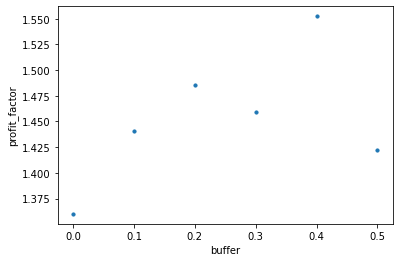

In [105]:
stats_all.groupby(['buffer']).quantile(0.9).reset_index().plot.scatter(x='buffer', y='profit_factor', s=10)

<AxesSubplot:xlabel='target', ylabel='kelly_adj_return'>

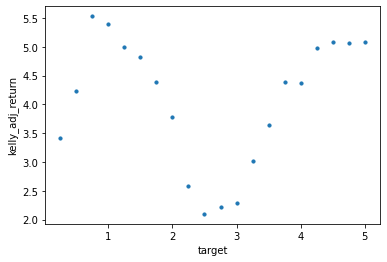

In [106]:
stats_all.groupby(['target']).quantile(0.9).reset_index().plot.scatter(x='target', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='stop', ylabel='kelly_adj_return'>

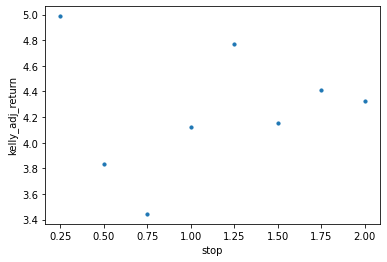

In [110]:
stats_all.groupby(['stop']).quantile(0.9).reset_index().plot.scatter(x='stop', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='target_r', ylabel='kelly_adj_return'>

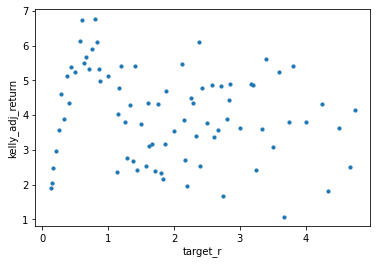

In [111]:
s = stats_all.groupby(['target_r']).quantile(0.9).reset_index()
s = s[s['target_r'] < 5]
s.plot.scatter(x='target_r', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='target_r', ylabel='kelly_adj_return'>

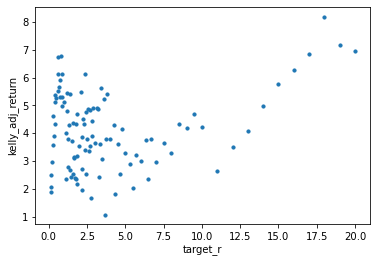

In [113]:
s = stats_all.groupby(['target_r']).quantile(0.9).reset_index()
s.plot.scatter(x='target_r', y='kelly_adj_return', s=10)

# LONG GRAPHS

<AxesSubplot:xlabel='buffer', ylabel='profit_factor'>

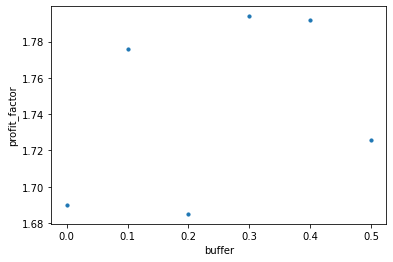

In [116]:
stats_longs.groupby(['buffer']).quantile(0.9).reset_index().plot.scatter(x='buffer', y='profit_factor', s=10)

<AxesSubplot:xlabel='target', ylabel='kelly_adj_return'>

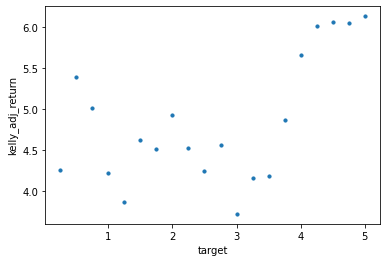

In [117]:
stats_longs.groupby(['target']).quantile(0.9).reset_index().plot.scatter(x='target', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='stop', ylabel='kelly_adj_return'>

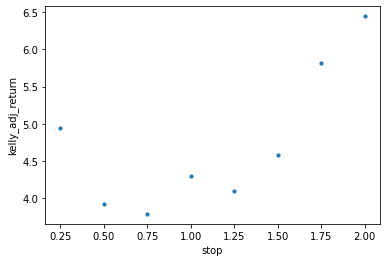

In [118]:
stats_longs.groupby(['stop']).quantile(0.9).reset_index().plot.scatter(x='stop', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='target_r', ylabel='kelly_adj_return'>

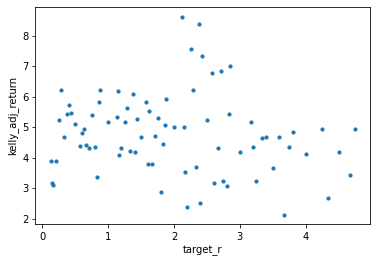

In [119]:
s = stats_longs.groupby(['target_r']).quantile(0.9).reset_index()
s = s[s['target_r'] < 5]
s.plot.scatter(x='target_r', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='target_r', ylabel='kelly_adj_return'>

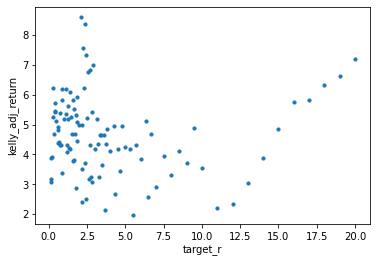

In [120]:
s = stats_longs.groupby(['target_r']).quantile(0.9).reset_index()
s.plot.scatter(x='target_r', y='kelly_adj_return', s=10)

# SHORT GRAPHS

<AxesSubplot:xlabel='buffer', ylabel='profit_factor'>

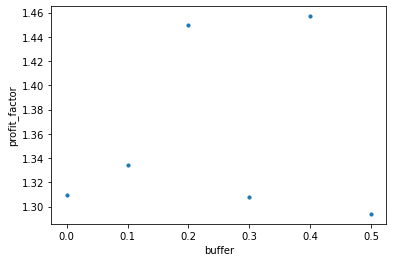

In [122]:
stats_shorts.groupby(['buffer']).quantile(0.9).reset_index().plot.scatter(x='buffer', y='profit_factor', s=10)

<AxesSubplot:xlabel='target', ylabel='kelly_adj_return'>

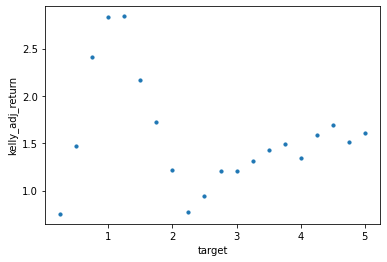

In [123]:
stats_shorts.groupby(['target']).quantile(0.9).reset_index().plot.scatter(x='target', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='stop', ylabel='kelly_adj_return'>

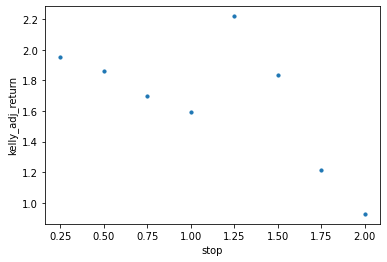

In [124]:
stats_shorts.groupby(['stop']).quantile(0.9).reset_index().plot.scatter(x='stop', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='target_r', ylabel='kelly_adj_return'>

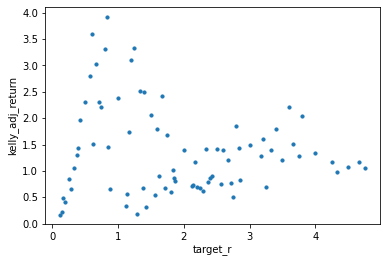

In [125]:
s = stats_shorts.groupby(['target_r']).quantile(0.9).reset_index()
s = s[s['target_r'] < 5]
s.plot.scatter(x='target_r', y='kelly_adj_return', s=10)

<AxesSubplot:xlabel='target_r', ylabel='kelly_adj_return'>

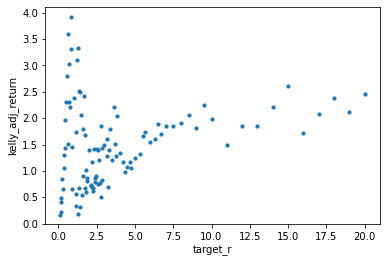

In [126]:
s = stats_shorts.groupby(['target_r']).quantile(0.9).reset_index()
s.plot.scatter(x='target_r', y='kelly_adj_return', s=10)

In [59]:
# TMP
x_stats_all = raw_stats_all[raw_stats_all['total_return_r'] < 0]
x_stats_longs = raw_stats_longs[raw_stats_longs['total_return_r'] < 0]
x_stats_shorts = raw_stats_shorts[raw_stats_shorts['total_return_r'] < 0]

In [80]:
def count_parameters(parameter_configuration):
    min_distance_range = [round(x, 2) for x in np.arange(parameter_configuration['min_distance_start'],
                                                         parameter_configuration['min_distance_end'] + (
                                                                     parameter_configuration['min_distance_step'] / 2),
                                                         parameter_configuration['min_distance_step'])]
    stop_range = [round(x, 2) for x in np.arange(parameter_configuration['stop_start'],
                                                 parameter_configuration['stop_end'] + (
                                                             parameter_configuration['stop_step'] / 2),
                                                 parameter_configuration['stop_step'])]
    buffer_range = [round(x, 2) for x in np.arange(parameter_configuration['buffer_start'],
                                                   parameter_configuration['buffer_end'] + (
                                                               parameter_configuration['buffer_step'] / 2),
                                                   parameter_configuration['buffer_step'])]
    target_range = [round(x, 2) for x in np.arange(parameter_configuration['target_start'],
                                                   parameter_configuration['target_end'] + (
                                                               parameter_configuration['target_step'] / 2),
                                                   parameter_configuration['target_step'])]

    return len(min_distance_range) * len(stop_range) * len(buffer_range) * len(target_range)


In [81]:
PARAMETER_CONFIGURATION = {
    'min_distance_start': 0.25,
    'min_distance_end': 2.5,
    'min_distance_step': 0.1,
    'stop_start': 0.25,
    'stop_end': 2.0,
    'stop_step': 0.25,
    'buffer_start': 0.0,
    'buffer_end': 0.5,
    'buffer_step': 0.1,
    'target_start': 0.25,
    'target_end': 5,
    'target_step': 0.25,
}
count_parameters(PARAMETER_CONFIGURATION)

23040

In [82]:
PARAMETER_CONFIGURATION = {
    'min_distance_start': 0.2,
    'min_distance_end': 2.5,
    'min_distance_step': 0.1,
    'stop_start': 0.2,
    'stop_end': 2.5,
    'stop_step': 0.1,
    'buffer_start': 0.0,
    'buffer_end': 0.7,
    'buffer_step': 0.1,
    'target_start': 0.2,
    'target_end': 5,
    'target_step': 0.1,
}
count_parameters(PARAMETER_CONFIGURATION)

225792

# DETERMINE BUCKET SIZE

In [143]:
t = pandas.read_pickle("../output/trades.pickle")

In [144]:
t.head()

,parameter_buffer,parameter_stop,parameter_target,target_r,distance,direction,date,entry_price,entry_order_price,exit_price,stop_hit,target_hit,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_distance,max_r,theoretical_r,r
0,0.0,0.25,0.25,1.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,365.68,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
1,0.0,0.25,0.50,2.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,365.43,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
2,0.0,0.25,0.75,3.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,365.18,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
3,0.0,0.25,1.00,4.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,364.93,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
4,0.0,0.25,1.25,5.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,364.68,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04


In [155]:
stats_all.sort_values(by=['hit_count', 'profit_factor'], ascending=False).head(1)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
179,0.2,0.1,0.25,5.0,20.0,9.432,10.949,548,14.234,248.56,1.525,0.051,12.777


In [151]:
stats_shorts.sort_values(by=['hit_count', 'profit_factor'], ascending=False).head(5)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
177,0.2,0.1,0.25,4.50,18.0,9.424,9.542,262,14.504,116.24,1.515,0.054,6.314
173,0.2,0.1,0.25,3.50,14.0,9.009,7.634,262,14.885,111.28,1.495,0.054,6.052
179,0.2,0.1,0.25,5.00,20.0,9.587,10.305,262,14.122,111.48,1.491,0.052,5.758
174,0.2,0.1,0.25,3.75,15.0,9.181,8.015,262,14.504,107.40,1.475,0.052,5.575
176,0.2,0.1,0.25,4.25,17.0,9.039,9.542,262,14.504,102.24,1.453,0.050,5.158


In [152]:
stats_longs.sort_values(by=['hit_count', 'profit_factor'], ascending=False).head(5)

,min_distance,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
765,0.2,0.4,1.75,1.50,0.857,0.893,13.402,291,59.794,34.21,1.328,0.148,5.048
785,0.2,0.4,2.00,1.50,0.750,0.808,15.808,291,61.856,29.40,1.310,0.147,4.307
795,0.2,0.4,2.00,4.00,2.000,1.483,38.832,291,46.735,39.84,1.301,0.108,4.311
635,0.2,0.3,2.00,4.00,2.000,1.498,39.175,291,46.735,38.74,1.295,0.112,4.328
638,0.2,0.3,2.00,4.75,2.375,1.562,44.330,291,45.704,39.50,1.295,0.109,4.324


In [153]:
t.head()

,parameter_buffer,parameter_stop,parameter_target,target_r,distance,direction,date,entry_price,entry_order_price,exit_price,stop_hit,target_hit,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_distance,max_r,theoretical_r,r
0,0.0,0.25,0.25,1.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,365.68,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
1,0.0,0.25,0.50,2.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,365.43,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
2,0.0,0.25,0.75,3.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,365.18,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
3,0.0,0.25,1.00,4.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,364.93,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04
4,0.0,0.25,1.25,5.0,0.56,short,2020-12-10,365.93,365.93,366.19,True,False,False,364.68,366.18,365.84,2020-12-10 14:39:49.048700+00:00,2020-12-10 14:39:50.039200+00:00,0.09,0.36,-1.04,-1.04


In [156]:
min_distance = 0.2
buffer = 0.1
stop = 0.25
target = 5.0
_t = t[(t['distance'] >= min_distance) & (t['parameter_buffer'] == buffer) & (t['parameter_stop'] == stop) & (t['parameter_target'] == target)]

In [158]:
_t.head()

,parameter_buffer,parameter_stop,parameter_target,target_r,distance,direction,date,entry_price,entry_order_price,exit_price,stop_hit,target_hit,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_distance,max_r,theoretical_r,r
179,0.1,0.25,5.0,20.0,0.46,short,2020-12-10,365.83,365.83,366.08,True,False,False,360.83,366.08,365.79,2020-12-10 14:39:35.805400+00:00,2020-12-10 14:39:39.410100+00:00,0.04,0.16,-1.0,-1.0
1939,0.1,0.25,5.0,20.0,0.43,short,2020-12-11,365.32,365.32,365.57,True,False,False,360.32,365.57,364.29,2020-12-11 14:31:15.229600+00:00,2020-12-11 14:50:30.294600+00:00,1.03,4.12,-1.0,-1.0
3059,0.1,0.25,5.0,20.0,1.12,short,2020-12-14,369.75,369.75,364.75,False,True,False,364.75,370.00,364.49,2020-12-14 15:06:24.723300+00:00,2020-12-14 20:59:59.574300+00:00,5.26,21.04,20.0,20.0
3219,0.1,0.25,5.0,20.0,0.66,long,2020-12-14,367.96,367.96,367.71,True,False,False,372.96,367.71,368.27,2020-12-14 16:01:02.766200+00:00,2020-12-14 16:07:29.344700+00:00,0.31,1.24,-1.0,-1.0
3379,0.1,0.25,5.0,20.0,1.78,long,2020-12-14,366.84,366.84,366.59,True,False,False,371.84,366.59,367.19,2020-12-14 17:48:40.152000+00:00,2020-12-14 18:02:45.220200+00:00,0.35,1.40,-1.0,-1.0


In [190]:
parameter_configuration = \
    {
        'distance_start': .25,
        'distance_end': 6,
        'distance_chunk_size': 0.25
    }

distance_range = [round(x, 2) for x in np.arange(parameter_configuration['distance_start'],
                                                 parameter_configuration['distance_end'] + (parameter_configuration['distance_chunk_size'] / 2),
                                                 parameter_configuration['distance_chunk_size']
                                                )]
distance_pairs = [*zip(distance_range, distance_range[1:])]

In [191]:
trades = []
for distance_pair in distance_pairs:
    min_distance_inclusive = distance_pair[0]
    max_distance_exclusive = distance_pair[1]
    
    downselection = _t[(_t['distance'] >= min_distance_inclusive) & (_t['distance'] < max_distance_exclusive)]
    downselection_size = downselection.shape[0]
    print(f'{min_distance_inclusive:.2f} -> {max_distance_exclusive:.2f}: {downselection_size}')


0.25 -> 0.50: 55
0.50 -> 0.75: 73
0.75 -> 1.00: 73
1.00 -> 1.25: 63
1.25 -> 1.50: 42
1.50 -> 1.75: 49
1.75 -> 2.00: 44
2.00 -> 2.25: 25
2.25 -> 2.50: 20
2.50 -> 2.75: 25
2.75 -> 3.00: 12
3.00 -> 3.25: 12
3.25 -> 3.50: 8
3.50 -> 3.75: 16
3.75 -> 4.00: 6
4.00 -> 4.25: 4
4.25 -> 4.50: 3
4.50 -> 4.75: 0
4.75 -> 5.00: 1
5.00 -> 5.25: 1
5.25 -> 5.50: 1
5.50 -> 5.75: 3
5.75 -> 6.00: 0


In [192]:
print(distance_range)

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]


In [195]:
downselection = _t[(_t['distance'] >= 3)]

In [198]:
downselection.sort_values(by='distance', ascending=False).head()

,parameter_buffer,parameter_stop,parameter_target,target_r,distance,direction,date,entry_price,entry_order_price,exit_price,stop_hit,target_hit,time_close,target_price,stop_price,max_target_exit_price,entry_time,max_target_exit_time,max_distance,max_r,theoretical_r,r
413459,0.1,0.25,5.0,20.0,7.75,long,2022-05-10,396.73,396.73,396.48,True,False,False,401.73,396.48,397.69,2022-05-10 15:10:49.357668864+00:00,2022-05-10 15:12:48.467033344+00:00,0.96,3.84,-1.00,-1.0
360979,0.1,0.25,5.0,20.0,6.73,long,2022-03-07,424.82,424.85,424.57,True,False,False,429.82,424.57,424.84,2022-03-07 16:39:38.628227758+00:00,2022-03-07 16:39:38.629358336+00:00,0.02,0.08,-1.12,-1.0
402259,0.1,0.25,5.0,20.0,6.57,long,2022-04-26,419.26,419.27,419.01,True,False,False,424.26,419.01,419.36,2022-04-26 17:28:43.157559962+00:00,2022-04-26 17:29:04.465492252+00:00,0.10,0.40,-1.04,-1.0
367219,0.1,0.25,5.0,20.0,5.72,short,2022-03-16,435.61,435.61,435.61,False,False,True,430.61,435.86,435.60,2022-03-16 19:59:59.062500312+00:00,2022-03-16 19:59:59.062560+00:00,0.01,0.04,-0.00,0.0
189939,0.1,0.25,5.0,20.0,5.66,short,2021-07-20,431.32,431.32,431.57,True,False,False,426.32,431.57,430.86,2021-07-20 16:04:03.659648789+00:00,2021-07-20 16:09:52.150338783+00:00,0.46,1.84,-1.00,-1.0


# ANALZYE RESULTS (ALL)

In [705]:
x = [0.25, 1.0, 1.5, 2.0, 2.5, 3.5, 4.5, 10]

In [706]:
distance_pairs = [*zip(x, x[1:])]

In [707]:
distance_keys = [f'{x[0]} -> {x[1]}' for x in distance_pairs]

In [708]:
raw_stats_all = pandas.read_pickle("../output_bucketed/stats_all.pickle")
raw_stats_longs = pandas.read_pickle("../output_bucketed/stats_longs.pickle")
raw_stats_shorts = pandas.read_pickle("../output_bucketed/stats_shorts.pickle")

In [709]:
stats_all = raw_stats_all[raw_stats_all['total_return_r'] > 0]
stats_longs = raw_stats_longs[raw_stats_longs['total_return_r'] > 0]
stats_shorts = raw_stats_shorts[raw_stats_shorts['total_return_r'] > 0]

In [710]:
stats_all = stats_all.sort_values(by='kelly_adj_return', ascending=False)
stats_longs = stats_longs.sort_values(by='kelly_adj_return', ascending=False)
stats_shorts = stats_shorts.sort_values(by='kelly_adj_return', ascending=False)

In [711]:
# SET PRIMARY
statz = stats_all

In [712]:
statz.head()

,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.800,2.795,30.189,53,49.057,43.73,2.691,0.308,13.481
6664,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.25,0.833,0.847,3.774,53,79.245,23.53,3.235,0.547,12.882
6139,2.0 -> 2.5,2.0,2.5,0.25,0.75,5.00,6.667,4.296,26.190,42,40.476,48.19,2.921,0.266,12.829
6134,2.0 -> 2.5,2.0,2.5,0.25,0.75,3.75,5.000,3.861,16.667,42,42.857,45.65,2.896,0.281,12.808
6219,2.0 -> 2.5,2.0,2.5,0.25,1.75,5.00,2.857,2.201,52.381,42,59.524,31.00,3.237,0.411,12.751


In [713]:
statz = statz[(statz['profit_factor'] > 1.5) & (statz['target_r'] <= 5)]

In [714]:
print()
for distance_key in distance_keys:
    print(distance_key)
    display(statz[statz['distance_key'] == distance_key].head(10))
    print()
    print()
    print()


0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
323,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.00,4.0,3.800,2.488,201,29.851,83.64,1.590,0.114,9.528
324,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.25,5.0,4.532,3.980,201,25.871,82.56,1.551,0.095,7.855
163,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.00,4.0,3.739,2.551,196,29.082,74.56,1.533,0.101,7.541
164,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.25,5.0,4.527,3.571,196,25.000,75.24,1.509,0.084,6.344





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2178,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.75,3.800,2.394,32.381,105,40.952,37.01,1.661,0.163,6.030
2179,1.0 -> 1.5,1.0,1.5,0.10,1.25,5.00,4.000,2.394,34.286,105,40.952,36.98,1.660,0.163,6.022
2219,1.0 -> 1.5,1.0,1.5,0.10,1.75,5.00,2.857,1.911,42.857,105,46.667,31.33,1.672,0.188,5.878
2697,1.0 -> 1.5,1.0,1.5,0.25,1.75,4.50,2.571,1.995,32.432,111,45.045,33.30,1.636,0.175,5.829
2177,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.50,3.600,2.368,29.524,105,40.952,35.99,1.642,0.160,5.765
2218,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.75,2.714,1.902,40.952,105,46.667,30.94,1.664,0.186,5.761
2698,1.0 -> 1.5,1.0,1.5,0.25,1.75,4.75,2.714,1.978,36.036,111,45.045,32.54,1.621,0.173,5.616
2679,1.0 -> 1.5,1.0,1.5,0.25,1.50,5.00,3.333,2.269,33.333,111,41.441,35.34,1.606,0.156,5.525
2217,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.50,2.571,1.878,38.095,105,46.667,29.98,1.643,0.183,5.477
2692,1.0 -> 1.5,1.0,1.5,0.25,1.75,3.25,1.857,1.701,27.027,111,48.649,29.58,1.611,0.185,5.460





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
5180,1.5 -> 2.0,1.5,2.0,0.5,1.0,0.25,0.250,0.250,0.000,59,86.441,4.74,1.592,0.321,1.523
5260,1.5 -> 2.0,1.5,2.0,0.5,2.0,0.25,0.125,0.148,1.695,59,91.525,2.42,1.596,0.342,0.827





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.800,2.795,30.189,53,49.057,43.73,2.691,0.308,13.481
6664,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.25,0.833,0.847,3.774,53,79.245,23.53,3.235,0.547,12.882
6134,2.0 -> 2.5,2.0,2.5,0.25,0.75,3.75,5.000,3.861,16.667,42,42.857,45.65,2.896,0.281,12.808
6219,2.0 -> 2.5,2.0,2.5,0.25,1.75,5.00,2.857,2.201,52.381,42,59.524,31.00,3.237,0.411,12.751
6657,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.50,3.600,2.690,30.189,53,49.057,41.13,2.590,0.301,12.388
6159,2.0 -> 2.5,2.0,2.5,0.25,1.00,5.00,5.000,3.414,26.190,42,45.238,41.91,2.821,0.292,12.238
6218,2.0 -> 2.5,2.0,2.5,0.25,1.75,4.75,2.714,2.153,50.000,42,59.524,30.02,3.166,0.407,12.225
6239,2.0 -> 2.5,2.0,2.5,0.25,2.00,5.00,2.500,2.010,54.762,42,61.905,28.42,3.266,0.430,12.207
6656,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.25,3.400,2.662,28.302,53,49.057,40.43,2.563,0.299,12.096
6647,2.0 -> 2.5,2.0,2.5,0.40,1.25,2.00,1.600,1.563,5.660,53,62.264,31.10,2.579,0.381,11.857





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
8183,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.00,2.000,1.912,3.636,55,56.364,35.48,2.470,0.335,11.901
8343,2.5 -> 3.5,2.5,3.5,0.40,0.50,1.00,2.000,1.899,3.846,52,55.769,32.28,2.395,0.325,10.486
8203,2.5 -> 3.5,2.5,3.5,0.35,0.75,1.00,1.333,1.275,3.636,55,65.455,27.14,2.416,0.384,10.413
8363,2.5 -> 3.5,2.5,3.5,0.40,0.75,1.00,1.333,1.278,3.846,52,65.385,25.49,2.415,0.383,9.764
8163,2.5 -> 3.5,2.5,3.5,0.35,0.25,1.00,4.000,3.747,3.636,55,38.182,45.00,2.314,0.217,9.757
7564,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.25,1.667,1.669,0.000,56,57.143,29.42,2.225,0.315,9.255
8181,2.5 -> 3.5,2.5,3.5,0.35,0.50,0.50,1.000,0.978,1.818,55,70.909,22.22,2.384,0.412,9.146
7199,2.5 -> 3.5,2.5,3.5,0.00,2.00,5.00,2.500,2.136,42.857,56,53.571,28.63,2.382,0.318,9.114
7308,2.5 -> 3.5,2.5,3.5,0.05,1.50,2.25,1.500,1.491,7.018,57,59.649,26.67,2.205,0.326,8.692
7565,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.50,2.000,1.985,1.786,56,51.786,30.59,2.132,0.275,8.411





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
9641,3.5 -> 4.5,3.5,4.5,0.25,0.75,0.50,0.667,0.670,0.0,23,73.913,5.39,1.898,0.350,1.885
10482,3.5 -> 4.5,3.5,4.5,0.50,1.25,0.75,0.600,0.600,0.0,11,81.818,3.40,2.700,0.515,1.752
9821,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.50,0.500,0.499,0.0,20,80.000,3.99,1.995,0.399,1.592
9481,3.5 -> 4.5,3.5,4.5,0.20,0.75,0.50,0.667,0.667,0.0,25,72.000,5.03,1.716,0.300,1.511
9661,3.5 -> 4.5,3.5,4.5,0.25,1.00,0.50,0.500,0.500,0.0,23,78.261,4.00,1.800,0.348,1.391
9822,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.75,0.750,0.749,0.0,20,70.000,4.49,1.747,0.299,1.344
9842,3.5 -> 4.5,3.5,4.5,0.30,1.25,0.75,0.600,0.598,0.0,20,75.000,3.98,1.793,0.332,1.320
9522,3.5 -> 4.5,3.5,4.5,0.20,1.25,0.75,0.600,0.660,4.0,25,72.000,4.44,1.698,0.296,1.314
10483,3.5 -> 4.5,3.5,4.5,0.50,1.25,1.00,0.800,0.797,0.0,11,72.727,3.39,2.126,0.385,1.306
9280,3.5 -> 4.5,3.5,4.5,0.15,0.25,0.25,1.000,0.989,0.0,28,60.714,5.88,1.529,0.210,1.235





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10607,4.5 -> 10,4.5,10.0,0.00,0.75,2.00,2.667,2.661,0.000,9,66.667,13.01,5.322,0.541,7.044
10584,4.5 -> 10,4.5,10.0,0.00,0.50,1.25,2.500,2.483,0.000,9,66.667,11.98,4.967,0.532,6.379
10604,4.5 -> 10,4.5,10.0,0.00,0.75,1.25,1.667,1.662,0.000,9,77.778,9.68,5.816,0.644,6.234
10606,4.5 -> 10,4.5,10.0,0.00,0.75,1.75,2.333,2.322,0.000,9,66.667,10.97,4.645,0.523,5.739
10602,4.5 -> 10,4.5,10.0,0.00,0.75,0.75,1.000,1.000,0.000,9,88.889,7.00,8.000,0.778,5.444
10581,4.5 -> 10,4.5,10.0,0.00,0.50,0.50,1.000,1.000,0.000,9,88.889,7.00,8.000,0.778,5.444
10582,4.5 -> 10,4.5,10.0,0.00,0.50,0.75,1.500,1.485,0.000,9,77.778,8.48,5.198,0.628,5.327
10764,4.5 -> 10,4.5,10.0,0.05,0.75,1.25,1.667,1.434,11.111,9,77.778,8.08,5.020,0.623,5.033
10647,4.5 -> 10,4.5,10.0,0.00,1.25,2.00,1.600,1.414,11.111,9,77.778,7.90,4.950,0.621,4.903
10644,4.5 -> 10,4.5,10.0,0.00,1.25,1.25,1.000,0.912,11.111,9,88.889,6.30,7.300,0.767,4.833


In [715]:
r = []
for distance_key in distance_keys:
    x = statz[statz['distance_key'] == distance_key]
    if x.empty:
        r.append({
            'av_dist': -1,
            'distance_key': distance_key,
            'buffer': -1,
            'stop': -1,
            'target': -1,
            'target_r': -1,
            'total_return_r': 0,
            'kelly_adj_return': 0,
            'hit_count': 0
        })
        continue
    xx = x.iloc[0]
    r.append({
        'av_dist': (xx['distance_min'] + xx['distance_max'])/2,
        'distance_key': xx['distance_key'],
        'buffer': xx['buffer'],
        'stop': xx['stop'],
        'target': xx['target'],
        'target_r': xx['target_r'],
        'total_return_r': xx['total_return_r'],
        'kelly_adj_return': xx['kelly_adj_return'],
        'hit_count': xx['hit_count']
    })
rr = pandas.DataFrame(r)

In [716]:
rr

,av_dist,distance_key,buffer,stop,target,target_r,total_return_r,kelly_adj_return,hit_count
0,0.625,0.25 -> 1.0,0.10,0.25,1.00,4.000,83.64,9.528,201
1,1.250,1.0 -> 1.5,0.10,1.25,4.75,3.800,37.01,6.030,105
2,1.750,1.5 -> 2.0,0.50,1.00,0.25,0.250,4.74,1.523,59
3,2.250,2.0 -> 2.5,0.40,1.25,4.75,3.800,43.73,13.481,53
4,3.000,2.5 -> 3.5,0.35,0.50,1.00,2.000,35.48,11.901,55
5,4.000,3.5 -> 4.5,0.25,0.75,0.50,0.667,5.39,1.885,23
6,7.250,4.5 -> 10,0.00,0.75,2.00,2.667,13.01,7.044,9


In [717]:
kelly_adj_return_sum = rr['kelly_adj_return'].sum()
total_return_r_sum = rr['total_return_r'].sum()
hit_count_sum = rr['hit_count'].sum()

print(f'kelly_adj_return_sum {kelly_adj_return_sum}')
print(f'total_return_r_sum {total_return_r_sum}')
print(f'hit_count_sum {hit_count_sum}')


kelly_adj_return_sum 51.39199999999999
total_return_r_sum 222.99999999999997
hit_count_sum 505


<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

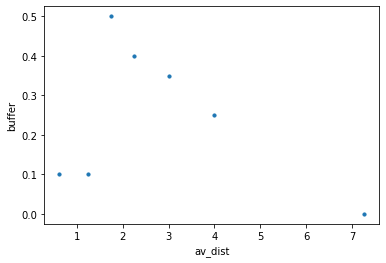

In [718]:
rr.plot.scatter(x='av_dist', y='buffer', s=10)

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

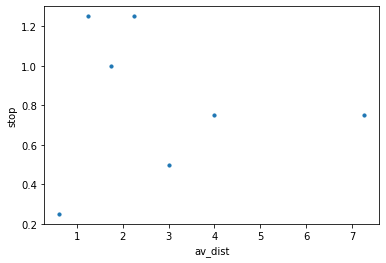

In [719]:
rr.plot.scatter(x='av_dist', y='stop', s=10)

<AxesSubplot:xlabel='av_dist', ylabel='target'>

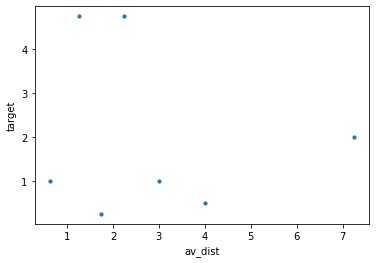

In [720]:
rr.plot.scatter(x='av_dist', y='target', s=10)

# ANALZYE RESULTS (SHORTS)

In [721]:
x = [0.25, 1.0, 1.5, 2.0, 2.5, 3.5, 4.5, 10]

In [722]:
distance_pairs = [*zip(x, x[1:])]

In [723]:
distance_keys = [f'{x[0]} -> {x[1]}' for x in distance_pairs]

In [724]:
raw_stats_all = pandas.read_pickle("../output_bucketed/stats_all.pickle")
raw_stats_longs = pandas.read_pickle("../output_bucketed/stats_longs.pickle")
raw_stats_shorts = pandas.read_pickle("../output_bucketed/stats_shorts.pickle")

In [725]:
stats_all = raw_stats_all[raw_stats_all['total_return_r'] > 0]
stats_longs = raw_stats_longs[raw_stats_longs['total_return_r'] > 0]
stats_shorts = raw_stats_shorts[raw_stats_shorts['total_return_r'] > 0]

In [726]:
stats_all = stats_all.sort_values(by='kelly_adj_return', ascending=False)
stats_longs = stats_longs.sort_values(by='kelly_adj_return', ascending=False)
stats_shorts = stats_shorts.sort_values(by='kelly_adj_return', ascending=False)

In [727]:
# SET PRIMARY
statz = stats_shorts

In [728]:
statz.head()

,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
8327,2.5 -> 3.5,2.50,3.5,0.40,0.25,2.00,8.0,7.299,3.448,29,31.034,46.24,3.285,0.216,9.981
169,0.25 -> 1.0,0.25,1.0,0.05,0.25,2.50,10.0,6.494,11.000,100,24.000,80.20,2.051,0.123,9.863
323,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.00,4.0,3.805,2.885,104,33.654,60.64,1.875,0.162,9.833
168,0.25 -> 1.0,0.25,1.0,0.05,0.25,2.25,9.0,6.075,11.000,100,25.000,77.20,2.025,0.127,9.769
8167,2.5 -> 3.5,2.50,3.5,0.35,0.25,2.00,8.0,6.895,6.897,29,31.034,42.48,3.103,0.210,8.935


In [729]:
statz = statz[(statz['profit_factor'] > 1.5) & (statz['target_r'] <= 5)]

In [730]:
print()
for distance_key in distance_keys:
    print(distance_key)
    display(statz[statz['distance_key'] == distance_key].head(10))
    print()
    print()
    print()


0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
323,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.00,4.0,3.805,2.885,104,33.654,60.64,1.875,0.162,9.833
163,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.00,4.0,3.697,3.000,100,33.000,55.28,1.821,0.149,8.225
322,0.25 -> 1.0,0.25,1.0,0.10,0.25,0.75,3.0,2.879,2.885,104,36.538,40.68,1.614,0.145,5.896
324,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.25,5.0,4.430,4.808,104,27.885,49.28,1.654,0.116,5.720
183,0.25 -> 1.0,0.25,1.0,0.05,0.50,1.00,2.0,1.857,5.000,100,46.000,31.40,1.582,0.169,5.315
162,0.25 -> 1.0,0.25,1.0,0.05,0.25,0.75,3.0,2.856,2.000,100,36.000,39.00,1.606,0.136,5.300
189,0.25 -> 1.0,0.25,1.0,0.05,0.50,2.50,5.0,3.250,16.000,100,33.000,40.22,1.601,0.124,4.981
164,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.25,5.0,4.418,4.000,100,27.000,46.48,1.634,0.105,4.869
321,0.25 -> 1.0,0.25,1.0,0.10,0.25,0.50,2.0,1.966,1.923,104,44.231,30.60,1.525,0.159,4.853
343,0.25 -> 1.0,0.25,1.0,0.10,0.50,1.00,2.0,1.962,3.846,104,44.231,29.84,1.522,0.158,4.716





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2972,1.0 -> 1.5,1.0,1.5,0.35,1.25,3.25,2.600,2.240,13.636,44,45.455,19.89,1.866,0.211,4.197
2932,1.0 -> 1.5,1.0,1.5,0.35,0.75,3.25,4.333,3.668,9.091,44,34.091,25.48,1.897,0.161,4.108
2872,1.0 -> 1.5,1.0,1.5,0.30,2.00,3.25,1.625,1.667,23.810,42,54.762,14.50,1.931,0.276,4.007
2992,1.0 -> 1.5,1.0,1.5,0.35,1.50,3.25,2.167,1.827,15.909,44,50.000,17.26,1.827,0.226,3.907
2873,1.0 -> 1.5,1.0,1.5,0.30,2.00,3.50,1.750,1.762,23.810,42,52.381,14.09,1.850,0.254,3.572
3032,1.0 -> 1.5,1.0,1.5,0.35,2.00,3.25,1.625,1.526,20.455,44,54.545,14.39,1.831,0.248,3.563
3012,1.0 -> 1.5,1.0,1.5,0.35,1.75,3.25,1.857,1.637,18.182,44,52.273,15.27,1.793,0.231,3.530
2971,1.0 -> 1.5,1.0,1.5,0.35,1.25,3.00,2.400,2.072,13.636,44,45.455,16.69,1.727,0.191,3.193
2852,1.0 -> 1.5,1.0,1.5,0.30,1.75,3.25,1.857,1.787,19.048,42,50.000,14.39,1.787,0.220,3.169
2931,1.0 -> 1.5,1.0,1.5,0.35,0.75,3.00,4.000,3.398,9.091,44,34.091,21.52,1.758,0.147,3.163





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
3755,1.5 -> 2.0,1.5,2.0,0.05,1.00,4.00,4.000,3.267,11.364,44,36.364,23.99,1.867,0.169,4.051
3754,1.5 -> 2.0,1.5,2.0,0.05,1.00,3.75,3.750,3.078,11.364,44,36.364,20.99,1.759,0.157,3.292
3815,1.5 -> 2.0,1.5,2.0,0.05,1.75,4.00,2.286,1.985,31.818,44,47.727,15.34,1.812,0.214,3.281
3756,1.5 -> 2.0,1.5,2.0,0.05,1.00,4.25,4.250,3.398,11.364,44,34.091,21.73,1.758,0.147,3.193
3795,1.5 -> 2.0,1.5,2.0,0.05,1.50,4.00,2.667,2.254,25.000,44,43.182,15.64,1.713,0.180,2.811
3819,1.5 -> 2.0,1.5,2.0,0.05,1.75,5.00,2.857,2.078,36.364,44,45.455,14.56,1.732,0.192,2.797
3814,1.5 -> 2.0,1.5,2.0,0.05,1.75,3.75,2.143,1.872,31.818,44,47.727,13.39,1.709,0.198,2.651
3775,1.5 -> 2.0,1.5,2.0,0.05,1.25,4.00,3.200,2.647,18.182,44,38.636,16.72,1.667,0.155,2.585
3753,1.5 -> 2.0,1.5,2.0,0.05,1.00,3.50,3.500,2.888,11.364,44,36.364,17.99,1.650,0.143,2.577
3816,1.5 -> 2.0,1.5,2.0,0.05,1.75,4.25,2.429,2.028,31.818,44,45.455,13.73,1.690,0.186,2.549





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6664,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.25,0.833,0.780,5.0,20,85.0,10.30,4.422,0.658,6.775
6684,2.0 -> 2.5,2.0,2.5,0.40,1.75,1.25,0.714,0.669,5.0,20,85.0,8.38,3.793,0.626,5.245
6983,2.0 -> 2.5,2.0,2.5,0.50,1.50,1.00,0.667,0.670,0.0,16,87.5,7.38,4.690,0.688,5.081
6704,2.0 -> 2.5,2.0,2.5,0.40,2.00,1.25,0.625,0.719,10.0,20,85.0,7.50,4.074,0.641,4.810
6663,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.00,0.667,0.630,5.0,20,85.0,7.74,3.571,0.612,4.737
6504,2.0 -> 2.5,2.0,2.5,0.35,1.50,1.25,0.833,0.782,5.0,20,80.0,8.51,3.127,0.544,4.631
6464,2.0 -> 2.5,2.0,2.5,0.35,1.00,1.25,1.250,1.165,5.0,20,70.0,10.33,2.719,0.443,4.571
6624,2.0 -> 2.5,2.0,2.5,0.40,1.00,1.25,1.250,1.164,5.0,20,70.0,10.29,2.715,0.442,4.550
6465,2.0 -> 2.5,2.0,2.5,0.35,1.00,1.50,1.500,1.390,5.0,20,65.0,11.08,2.581,0.398,4.411
6463,2.0 -> 2.5,2.0,2.5,0.35,1.00,1.00,1.000,0.939,5.0,20,75.0,9.09,2.818,0.484,4.398





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
8183,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.00,2.000,1.945,3.448,29,58.621,21.24,2.755,0.373,7.932
8343,2.5 -> 3.5,2.5,3.5,0.40,0.50,1.00,2.000,1.936,3.448,29,58.621,21.12,2.743,0.372,7.866
8363,2.5 -> 3.5,2.5,3.5,0.40,0.75,1.00,1.333,1.302,3.448,29,68.966,17.08,2.894,0.451,7.708
7564,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.25,1.667,1.670,0.000,29,62.069,19.06,2.733,0.394,7.501
8184,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.25,2.500,2.385,3.448,29,51.724,22.12,2.556,0.315,6.964
7597,2.5 -> 3.5,2.5,3.5,0.15,1.00,4.50,4.500,3.682,17.241,29,41.379,25.99,2.599,0.255,6.617
8347,2.5 -> 3.5,2.5,3.5,0.40,0.50,2.00,4.000,3.567,6.897,29,41.379,26.02,2.518,0.249,6.491
7565,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.50,2.000,1.976,3.448,29,55.172,18.61,2.432,0.325,6.045
8503,2.5 -> 3.5,2.5,3.5,0.45,0.50,1.00,2.000,1.938,3.226,31,54.839,19.06,2.354,0.315,6.011
7596,2.5 -> 3.5,2.5,3.5,0.15,1.00,4.25,4.250,3.508,17.241,29,41.379,23.99,2.476,0.247,5.918





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10302,3.5 -> 4.5,3.5,4.5,0.45,1.00,0.75,0.75,0.750,0.00,8,87.500,4.25,5.250,0.708,3.010
9842,3.5 -> 4.5,3.5,4.5,0.30,1.25,0.75,0.60,0.600,0.00,13,84.615,4.60,3.300,0.590,2.713
9482,3.5 -> 4.5,3.5,4.5,0.20,0.75,0.75,1.00,1.080,6.25,16,68.750,6.37,2.376,0.398,2.536
9843,3.5 -> 4.5,3.5,4.5,0.30,1.25,1.00,0.80,0.800,0.00,13,76.923,5.00,2.667,0.481,2.404
10322,3.5 -> 4.5,3.5,4.5,0.45,1.25,0.75,0.60,0.600,0.00,8,87.500,3.20,4.200,0.667,2.133
10142,3.5 -> 4.5,3.5,4.5,0.40,1.00,0.75,0.75,0.750,0.00,10,80.000,4.00,3.000,0.533,2.133
10482,3.5 -> 4.5,3.5,4.5,0.50,1.25,0.75,0.60,0.600,0.00,8,87.500,3.20,4.200,0.667,2.133
9822,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.75,0.75,0.750,0.00,13,76.923,4.50,2.500,0.462,2.077
10303,3.5 -> 4.5,3.5,4.5,0.45,1.00,1.00,1.00,1.000,0.00,8,75.000,4.00,3.000,0.500,2.000
10306,3.5 -> 4.5,3.5,4.5,0.45,1.00,1.75,1.75,1.612,12.50,8,62.500,5.06,2.687,0.392,1.985





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10722,4.5 -> 10,4.5,10.0,0.05,0.25,0.75,3.0,2.067,25.0,4,75.0,5.20,6.200,0.629,3.271
10561,4.5 -> 10,4.5,10.0,0.00,0.25,0.50,2.0,2.000,0.0,4,75.0,5.00,6.000,0.625,3.125
10588,4.5 -> 10,4.5,10.0,0.00,0.50,2.25,4.5,4.455,0.0,4,50.0,6.98,4.455,0.388,2.707
10587,4.5 -> 10,4.5,10.0,0.00,0.50,2.00,4.0,3.960,0.0,4,50.0,5.98,3.960,0.374,2.235
10582,4.5 -> 10,4.5,10.0,0.00,0.50,0.75,1.5,1.471,0.0,4,75.0,3.48,4.412,0.580,2.018
11040,4.5 -> 10,4.5,10.0,0.15,0.25,0.25,1.0,5.000,25.0,4,75.0,2.80,15.000,0.700,1.960
10586,4.5 -> 10,4.5,10.0,0.00,0.50,1.75,3.5,3.465,0.0,4,50.0,4.98,3.465,0.356,1.771
11200,4.5 -> 10,4.5,10.0,0.20,0.25,0.25,1.0,2.500,25.0,4,75.0,2.60,7.500,0.650,1.690
10648,4.5 -> 10,4.5,10.0,0.00,1.25,2.25,1.8,1.300,25.0,4,75.0,2.90,3.900,0.558,1.617
10647,4.5 -> 10,4.5,10.0,0.00,1.25,2.00,1.6,1.167,25.0,4,75.0,2.50,3.500,0.536,1.339


In [731]:
r = []
for distance_key in distance_keys:
    x = statz[statz['distance_key'] == distance_key]
    if x.empty:
        r.append({
            'av_dist': -1,
            'distance_key': distance_key,
            'buffer': -1,
            'stop': -1,
            'target': -1,
            'target_r': -1,
            'total_return_r': 0,
            'kelly_adj_return': 0,
            'hit_count': 0
        })
        continue
    xx = x.iloc[0]
    r.append({
        'av_dist': (xx['distance_min'] + xx['distance_max'])/2,
        'distance_key': xx['distance_key'],
        'buffer': xx['buffer'],
        'stop': xx['stop'],
        'target': xx['target'],
        'target_r': xx['target_r'],
        'total_return_r': xx['total_return_r'],
        'kelly_adj_return': xx['kelly_adj_return'],
        'hit_count': xx['hit_count']
    })
rr = pandas.DataFrame(r)

In [732]:
rr

,av_dist,distance_key,buffer,stop,target,target_r,total_return_r,kelly_adj_return,hit_count
0,0.625,0.25 -> 1.0,0.10,0.25,1.00,4.000,60.64,9.833,104
1,1.250,1.0 -> 1.5,0.35,1.25,3.25,2.600,19.89,4.197,44
2,1.750,1.5 -> 2.0,0.05,1.00,4.00,4.000,23.99,4.051,44
3,2.250,2.0 -> 2.5,0.40,1.50,1.25,0.833,10.30,6.775,20
4,3.000,2.5 -> 3.5,0.35,0.50,1.00,2.000,21.24,7.932,29
5,4.000,3.5 -> 4.5,0.45,1.00,0.75,0.750,4.25,3.010,8
6,7.250,4.5 -> 10,0.05,0.25,0.75,3.000,5.20,3.271,4


In [733]:
kelly_adj_return_sum = rr['kelly_adj_return'].sum()
total_return_r_sum = rr['total_return_r'].sum()
hit_count_sum = rr['hit_count'].sum()

print(f'kelly_adj_return_sum {kelly_adj_return_sum}')
print(f'total_return_r_sum {total_return_r_sum}')
print(f'hit_count_sum {hit_count_sum}')

kelly_adj_return_sum 39.069
total_return_r_sum 145.51
hit_count_sum 253


<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

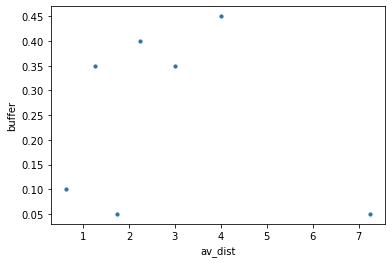

In [734]:
rr.plot.scatter(x='av_dist', y='buffer', s=10)

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

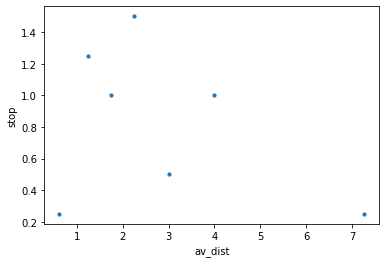

In [735]:
rr.plot.scatter(x='av_dist', y='stop', s=10)

<AxesSubplot:xlabel='av_dist', ylabel='target'>

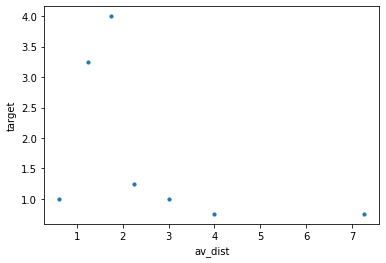

In [736]:
rr.plot.scatter(x='av_dist', y='target', s=10)

# ANALZYE RESULTS (LONGS)

In [9]:
def summarize_stats(file, distance_points):
    distance_pairs = [*zip(distance_points, distance_points[1:])]
    distance_keys = [f'{x[0]} -> {x[1]}' for x in distance_pairs]

    stats = pandas.read_pickle(f"../output_bucketed/{file}.pickle")
    stats = stats[stats['total_return_r'] > 0]
    stats = stats.sort_values(by='kelly_adj_return', ascending=False)

    # Picky downselect
    stats = stats[(stats['profit_factor'] > 1.5) & (stats['target_r'] <= 5)]

    print()
    for distance_key in distance_keys:
        print(distance_key)
        display(stats[stats['distance_key'] == distance_key].head(30))
        print()
        print()
        print()





    r = []
    for distance_key in distance_keys:
        x = stats[stats['distance_key'] == distance_key]
        if x.empty:
            r.append({
                'av_dist': -1,
                'distance_key': distance_key,
                'buffer': -1,
                'stop': -1,
                'target': -1,
                'target_r': -1,
                'total_return_r': 0,
                'kelly_adj_return': 0,
                'hit_count': 0
            })
            continue
        xx = x.iloc[0]
        r.append({
            'av_dist': (xx['distance_min'] + xx['distance_max'])/2,
            'distance_key': xx['distance_key'],
            'buffer': xx['buffer'],
            'stop': xx['stop'],
            'target': xx['target'],
            'target_r': xx['target_r'],
            'profit_factor': xx['profit_factor'],
            'total_return_r': xx['total_return_r'],
            'kelly_adj_return': xx['kelly_adj_return'],
            'hit_count': xx['hit_count']
        })
    rr = pandas.DataFrame(r)

    display(rr.head(50))


    print()
    kelly_adj_return_sum = rr['kelly_adj_return'].sum()
    total_return_r_sum = rr['total_return_r'].sum()
    hit_count_sum = rr['hit_count'].sum()

    print('SUMMARY OF TOTALS:')
    print(f'kelly_adj_return_sum {kelly_adj_return_sum}')
    print(f'total_return_r_sum {total_return_r_sum}')
    print(f'hit_count_sum {hit_count_sum}')
    print()

    display(rr.plot.scatter(x='av_dist', y='buffer', s=10))
    display(rr.plot.scatter(x='av_dist', y='stop', s=10))
    display(rr.plot.scatter(x='av_dist', y='target', s=10))



0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
323,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.00,4.0,3.800,2.488,201,29.851,83.64,1.590,0.114,9.528
324,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.25,5.0,4.532,3.980,201,25.871,82.56,1.551,0.095,7.855
163,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.00,4.0,3.739,2.551,196,29.082,74.56,1.533,0.101,7.541
164,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.25,5.0,4.527,3.571,196,25.000,75.24,1.509,0.084,6.344





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2178,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.75,3.800,2.394,32.381,105,40.952,37.01,1.661,0.163,6.030
2179,1.0 -> 1.5,1.0,1.5,0.10,1.25,5.00,4.000,2.394,34.286,105,40.952,36.98,1.660,0.163,6.022
2219,1.0 -> 1.5,1.0,1.5,0.10,1.75,5.00,2.857,1.911,42.857,105,46.667,31.33,1.672,0.188,5.878
2697,1.0 -> 1.5,1.0,1.5,0.25,1.75,4.50,2.571,1.995,32.432,111,45.045,33.30,1.636,0.175,5.829
2177,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.50,3.600,2.368,29.524,105,40.952,35.99,1.642,0.160,5.765
2218,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.75,2.714,1.902,40.952,105,46.667,30.94,1.664,0.186,5.761
2698,1.0 -> 1.5,1.0,1.5,0.25,1.75,4.75,2.714,1.978,36.036,111,45.045,32.54,1.621,0.173,5.616
2679,1.0 -> 1.5,1.0,1.5,0.25,1.50,5.00,3.333,2.269,33.333,111,41.441,35.34,1.606,0.156,5.525
2217,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.50,2.571,1.878,38.095,105,46.667,29.98,1.643,0.183,5.477
2692,1.0 -> 1.5,1.0,1.5,0.25,1.75,3.25,1.857,1.701,27.027,111,48.649,29.58,1.611,0.185,5.460





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
5180,1.5 -> 2.0,1.5,2.0,0.5,1.0,0.25,0.250,0.250,0.000,59,86.441,4.74,1.592,0.321,1.523
5260,1.5 -> 2.0,1.5,2.0,0.5,2.0,0.25,0.125,0.148,1.695,59,91.525,2.42,1.596,0.342,0.827





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.800,2.795,30.189,53,49.057,43.73,2.691,0.308,13.481
6664,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.25,0.833,0.847,3.774,53,79.245,23.53,3.235,0.547,12.882
6134,2.0 -> 2.5,2.0,2.5,0.25,0.75,3.75,5.000,3.861,16.667,42,42.857,45.65,2.896,0.281,12.808
6219,2.0 -> 2.5,2.0,2.5,0.25,1.75,5.00,2.857,2.201,52.381,42,59.524,31.00,3.237,0.411,12.751
6657,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.50,3.600,2.690,30.189,53,49.057,41.13,2.590,0.301,12.388
6159,2.0 -> 2.5,2.0,2.5,0.25,1.00,5.00,5.000,3.414,26.190,42,45.238,41.91,2.821,0.292,12.238
6218,2.0 -> 2.5,2.0,2.5,0.25,1.75,4.75,2.714,2.153,50.000,42,59.524,30.02,3.166,0.407,12.225
6239,2.0 -> 2.5,2.0,2.5,0.25,2.00,5.00,2.500,2.010,54.762,42,61.905,28.42,3.266,0.430,12.207
6656,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.25,3.400,2.662,28.302,53,49.057,40.43,2.563,0.299,12.096
6647,2.0 -> 2.5,2.0,2.5,0.40,1.25,2.00,1.600,1.563,5.660,53,62.264,31.10,2.579,0.381,11.857





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
8183,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.00,2.000,1.912,3.636,55,56.364,35.48,2.470,0.335,11.901
8343,2.5 -> 3.5,2.5,3.5,0.40,0.50,1.00,2.000,1.899,3.846,52,55.769,32.28,2.395,0.325,10.486
8203,2.5 -> 3.5,2.5,3.5,0.35,0.75,1.00,1.333,1.275,3.636,55,65.455,27.14,2.416,0.384,10.413
8363,2.5 -> 3.5,2.5,3.5,0.40,0.75,1.00,1.333,1.278,3.846,52,65.385,25.49,2.415,0.383,9.764
8163,2.5 -> 3.5,2.5,3.5,0.35,0.25,1.00,4.000,3.747,3.636,55,38.182,45.00,2.314,0.217,9.757
7564,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.25,1.667,1.669,0.000,56,57.143,29.42,2.225,0.315,9.255
8181,2.5 -> 3.5,2.5,3.5,0.35,0.50,0.50,1.000,0.978,1.818,55,70.909,22.22,2.384,0.412,9.146
7199,2.5 -> 3.5,2.5,3.5,0.00,2.00,5.00,2.500,2.136,42.857,56,53.571,28.63,2.382,0.318,9.114
7308,2.5 -> 3.5,2.5,3.5,0.05,1.50,2.25,1.500,1.491,7.018,57,59.649,26.67,2.205,0.326,8.692
7565,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.50,2.000,1.985,1.786,56,51.786,30.59,2.132,0.275,8.411





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
9641,3.5 -> 4.5,3.5,4.5,0.25,0.75,0.50,0.667,0.670,0.000,23,73.913,5.39,1.898,0.350,1.885
10482,3.5 -> 4.5,3.5,4.5,0.50,1.25,0.75,0.600,0.600,0.000,11,81.818,3.40,2.700,0.515,1.752
9821,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.50,0.500,0.499,0.000,20,80.000,3.99,1.995,0.399,1.592
9481,3.5 -> 4.5,3.5,4.5,0.20,0.75,0.50,0.667,0.667,0.000,25,72.000,5.03,1.716,0.300,1.511
9661,3.5 -> 4.5,3.5,4.5,0.25,1.00,0.50,0.500,0.500,0.000,23,78.261,4.00,1.800,0.348,1.391
9822,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.75,0.750,0.749,0.000,20,70.000,4.49,1.747,0.299,1.344
9842,3.5 -> 4.5,3.5,4.5,0.30,1.25,0.75,0.600,0.598,0.000,20,75.000,3.98,1.793,0.332,1.320
9522,3.5 -> 4.5,3.5,4.5,0.20,1.25,0.75,0.600,0.660,4.000,25,72.000,4.44,1.698,0.296,1.314
10483,3.5 -> 4.5,3.5,4.5,0.50,1.25,1.00,0.800,0.797,0.000,11,72.727,3.39,2.126,0.385,1.306
9280,3.5 -> 4.5,3.5,4.5,0.15,0.25,0.25,1.000,0.989,0.000,28,60.714,5.88,1.529,0.210,1.235





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10607,4.5 -> 10,4.5,10.0,0.00,0.75,2.00,2.667,2.661,0.000,9,66.667,13.01,5.322,0.541,7.044
10584,4.5 -> 10,4.5,10.0,0.00,0.50,1.25,2.500,2.483,0.000,9,66.667,11.98,4.967,0.532,6.379
10604,4.5 -> 10,4.5,10.0,0.00,0.75,1.25,1.667,1.662,0.000,9,77.778,9.68,5.816,0.644,6.234
10606,4.5 -> 10,4.5,10.0,0.00,0.75,1.75,2.333,2.322,0.000,9,66.667,10.97,4.645,0.523,5.739
10602,4.5 -> 10,4.5,10.0,0.00,0.75,0.75,1.000,1.000,0.000,9,88.889,7.00,8.000,0.778,5.444
10581,4.5 -> 10,4.5,10.0,0.00,0.50,0.50,1.000,1.000,0.000,9,88.889,7.00,8.000,0.778,5.444
10582,4.5 -> 10,4.5,10.0,0.00,0.50,0.75,1.500,1.485,0.000,9,77.778,8.48,5.198,0.628,5.327
10764,4.5 -> 10,4.5,10.0,0.05,0.75,1.25,1.667,1.434,11.111,9,77.778,8.08,5.020,0.623,5.033
10647,4.5 -> 10,4.5,10.0,0.00,1.25,2.00,1.600,1.414,11.111,9,77.778,7.90,4.950,0.621,4.903
10644,4.5 -> 10,4.5,10.0,0.00,1.25,1.25,1.000,0.912,11.111,9,88.889,6.30,7.300,0.767,4.833


,av_dist,distance_key,buffer,stop,target,target_r,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.625,0.25 -> 1.0,0.10,0.25,1.00,4.000,1.590,83.64,9.528,201
1,1.250,1.0 -> 1.5,0.10,1.25,4.75,3.800,1.661,37.01,6.030,105
2,1.750,1.5 -> 2.0,0.50,1.00,0.25,0.250,1.592,4.74,1.523,59
3,2.250,2.0 -> 2.5,0.40,1.25,4.75,3.800,2.691,43.73,13.481,53
4,3.000,2.5 -> 3.5,0.35,0.50,1.00,2.000,2.470,35.48,11.901,55
5,4.000,3.5 -> 4.5,0.25,0.75,0.50,0.667,1.898,5.39,1.885,23
6,7.250,4.5 -> 10,0.00,0.75,2.00,2.667,5.322,13.01,7.044,9



SUMMARY OF TOTALS:
kelly_adj_return_sum 51.39199999999999
total_return_r_sum 222.99999999999997
hit_count_sum 505



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

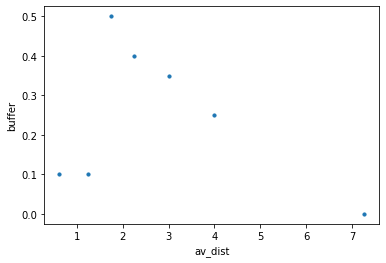

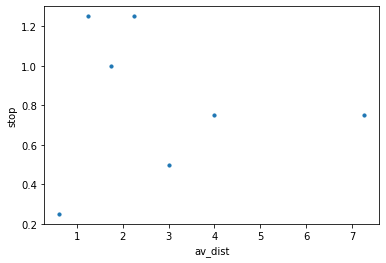

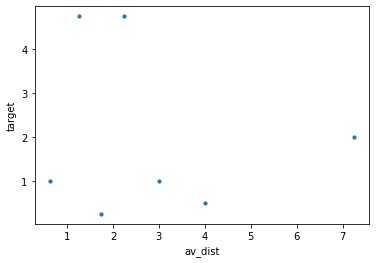

In [11]:
xx()

In [754]:
statz.head()

,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6114,2.0 -> 2.5,2.0,2.5,0.25,0.50,3.75,7.5,6.835,7.143,28,39.286,58.32,4.423,0.304,17.731
6594,2.0 -> 2.5,2.0,2.5,0.40,0.50,3.75,7.5,6.945,3.030,33,36.364,62.82,3.969,0.272,17.088
6113,2.0 -> 2.5,2.0,2.5,0.25,0.50,3.50,7.0,6.427,7.143,28,39.286,53.82,4.158,0.298,16.059
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.8,3.105,30.303,33,54.545,39.39,3.726,0.399,15.719
6119,2.0 -> 2.5,2.0,2.5,0.25,0.50,5.00,10.0,7.547,21.429,28,35.714,57.60,4.193,0.272,15.665


In [756]:
print()
for distance_key in distance_keys:
    print(distance_key)
    display(statz[statz['distance_key'] == distance_key].head(30))
    print()
    print()
    print()


0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2179,1.0 -> 1.5,1.0,1.5,0.10,1.25,5.00,4.000,2.599,39.344,61,44.262,31.33,2.064,0.228,7.148
2219,1.0 -> 1.5,1.0,1.5,0.10,1.75,5.00,2.857,2.176,47.541,61,49.180,26.57,2.106,0.258,6.863
1918,1.0 -> 1.5,1.0,1.5,0.00,2.00,4.75,2.375,1.825,45.161,62,53.226,24.65,2.076,0.276,6.802
2178,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.75,3.800,2.527,37.705,61,44.262,29.64,2.006,0.222,6.581
1878,1.0 -> 1.5,1.0,1.5,0.00,1.50,4.75,3.167,2.252,37.097,62,46.774,27.87,1.979,0.231,6.450
1879,1.0 -> 1.5,1.0,1.5,0.00,1.50,5.00,3.333,2.251,41.935,62,46.774,27.83,1.978,0.231,6.436
2177,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.50,3.600,2.507,34.426,61,44.262,29.18,1.991,0.220,6.428
2078,1.0 -> 1.5,1.0,1.5,0.05,2.00,4.75,2.375,1.916,49.123,57,52.632,22.89,2.129,0.279,6.388
2218,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.75,2.714,2.109,45.902,61,49.180,25.00,2.041,0.251,6.270
2199,1.0 -> 1.5,1.0,1.5,0.10,1.50,5.00,3.333,2.367,44.262,61,45.902,27.07,2.008,0.230,6.238





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
4964,1.5 -> 2.0,1.5,2.0,0.45,0.25,1.25,5.000,5.000,0.000,33,30.303,27.00,2.174,0.164,4.418
4982,1.5 -> 2.0,1.5,2.0,0.45,0.50,0.75,1.500,1.494,0.000,33,57.576,14.44,2.027,0.292,4.212
4963,1.5 -> 2.0,1.5,2.0,0.45,0.25,1.00,4.000,4.000,0.000,33,33.333,22.00,2.000,0.167,3.667
5140,1.5 -> 2.0,1.5,2.0,0.50,0.50,0.25,0.500,0.496,0.000,28,82.143,6.46,2.282,0.461,2.981
4803,1.5 -> 2.0,1.5,2.0,0.40,0.25,1.00,4.000,3.981,0.000,36,30.556,18.88,1.752,0.131,2.475
4802,1.5 -> 2.0,1.5,2.0,0.40,0.25,0.75,3.000,2.984,0.000,36,36.111,15.88,1.687,0.147,2.335
4962,1.5 -> 2.0,1.5,2.0,0.45,0.25,0.75,3.000,3.000,0.000,33,36.364,15.00,1.714,0.152,2.273
5120,1.5 -> 2.0,1.5,2.0,0.50,0.25,0.25,1.000,0.996,0.000,28,64.286,7.96,1.793,0.284,2.263
4980,1.5 -> 2.0,1.5,2.0,0.45,0.50,0.25,0.500,0.500,0.000,33,78.788,6.00,1.857,0.364,2.182
5022,1.5 -> 2.0,1.5,2.0,0.45,1.00,0.75,0.750,0.750,0.000,33,69.697,7.25,1.725,0.293,2.124





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.800,3.105,30.303,33,54.545,39.39,3.726,0.399,15.719
6657,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.50,3.600,2.990,30.303,33,54.545,37.39,3.588,0.393,14.710
6656,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.25,3.400,2.984,27.273,33,54.545,37.29,3.581,0.393,14.659
6614,2.0 -> 2.5,2.0,2.5,0.40,0.75,3.75,5.000,4.618,6.061,33,42.424,45.67,3.402,0.300,13.681
6655,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.00,3.200,2.860,24.242,33,54.545,35.14,3.432,0.387,13.582
6654,2.0 -> 2.5,2.0,2.5,0.40,1.25,3.75,3.000,2.810,15.152,33,54.545,34.27,3.372,0.384,13.149
6774,2.0 -> 2.5,2.0,2.5,0.45,0.75,3.75,5.000,4.560,10.000,30,43.333,42.36,3.487,0.309,13.092
6659,2.0 -> 2.5,2.0,2.5,0.40,1.25,5.00,4.000,3.093,36.364,33,51.515,35.33,3.287,0.358,12.663
6613,2.0 -> 2.5,2.0,2.5,0.40,0.75,3.50,4.667,4.335,6.061,33,42.424,41.71,3.194,0.291,12.155
6651,2.0 -> 2.5,2.0,2.5,0.40,1.25,3.00,2.400,2.401,9.091,33,57.576,30.35,3.258,0.399,12.111





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
7199,2.5 -> 3.5,2.5,3.5,0.00,2.00,5.00,2.500,2.181,45.161,31,61.290,23.06,3.272,0.435,10.041
7197,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.50,2.250,2.123,41.935,31,61.290,22.17,3.184,0.431,9.545
7198,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.75,2.375,2.118,45.161,31,61.290,22.10,3.177,0.430,9.506
7348,2.5 -> 3.5,2.5,3.5,0.05,2.00,2.25,1.125,1.243,12.903,31,74.194,17.75,3.572,0.534,9.483
7196,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.25,2.125,2.109,32.258,31,61.290,21.96,3.164,0.429,9.429
7508,2.5 -> 3.5,2.5,3.5,0.10,2.00,2.25,1.125,1.135,6.452,31,74.194,17.48,3.264,0.515,8.996
7488,2.5 -> 3.5,2.5,3.5,0.10,1.75,2.25,1.286,1.260,3.226,31,70.968,18.73,3.079,0.479,8.975
7195,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.00,2.000,2.014,32.258,31,61.290,20.52,3.022,0.421,8.634
7353,2.5 -> 3.5,2.5,3.5,0.05,2.00,3.50,1.750,2.003,29.032,31,61.290,20.06,3.171,0.420,8.418
7347,2.5 -> 3.5,2.5,3.5,0.05,2.00,2.00,1.000,1.139,9.677,31,74.194,15.69,3.274,0.515,8.085





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
9042,3.5 -> 4.5,3.5,4.5,0.05,1.25,0.75,0.600,0.600,0.0,12,83.333,4.00,3.000,0.556,2.222
8862,3.5 -> 4.5,3.5,4.5,0.00,1.00,0.75,0.750,0.745,0.0,13,76.923,4.48,2.483,0.459,2.059
8902,3.5 -> 4.5,3.5,4.5,0.00,1.50,0.75,0.500,0.500,0.0,13,84.615,3.50,2.750,0.538,1.885
9142,3.5 -> 4.5,3.5,4.5,0.10,0.50,0.75,1.500,1.485,0.0,10,60.000,4.96,2.228,0.331,1.640
9022,3.5 -> 4.5,3.5,4.5,0.05,1.00,0.75,0.750,0.750,0.0,12,75.000,3.75,2.250,0.417,1.562
9062,3.5 -> 4.5,3.5,4.5,0.05,1.50,0.75,0.500,0.500,0.0,12,83.333,3.00,2.500,0.500,1.500
8922,3.5 -> 4.5,3.5,4.5,0.00,1.75,0.75,0.429,0.430,0.0,13,84.615,2.73,2.365,0.488,1.333
9002,3.5 -> 4.5,3.5,4.5,0.05,0.75,0.75,1.000,0.998,0.0,12,66.667,3.99,1.995,0.332,1.327
9122,3.5 -> 4.5,3.5,4.5,0.10,0.25,0.75,3.000,3.000,0.0,10,40.000,6.00,2.000,0.200,1.200
8882,3.5 -> 4.5,3.5,4.5,0.00,1.25,0.75,0.600,0.600,0.0,13,76.923,3.00,2.000,0.385,1.154





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
12004,4.5 -> 10,4.5,10.0,0.45,0.25,1.25,5.000,4.870,0.0,7,57.143,16.92,6.494,0.483,8.180
10607,4.5 -> 10,4.5,10.0,0.00,0.75,2.00,2.667,2.670,0.0,5,80.000,9.68,10.680,0.725,7.019
12087,4.5 -> 10,4.5,10.0,0.45,1.25,2.00,1.600,1.600,0.0,7,85.714,8.60,9.600,0.768,6.604
10584,4.5 -> 10,4.5,10.0,0.00,0.50,1.25,2.500,2.500,0.0,5,80.000,9.00,10.000,0.720,6.480
12027,4.5 -> 10,4.5,10.0,0.45,0.50,2.00,4.000,3.974,0.0,7,57.143,12.98,5.298,0.464,6.017
12003,4.5 -> 10,4.5,10.0,0.45,0.25,1.00,4.000,3.896,0.0,7,57.143,12.92,5.195,0.461,5.962
10606,4.5 -> 10,4.5,10.0,0.00,0.75,1.75,2.333,2.330,0.0,5,80.000,8.32,9.320,0.714,5.942
12107,4.5 -> 10,4.5,10.0,0.45,1.50,2.00,1.333,1.330,0.0,7,85.714,6.98,7.980,0.750,5.233
11927,4.5 -> 10,4.5,10.0,0.40,1.25,2.00,1.600,1.584,0.0,6,83.333,6.99,7.921,0.728,5.090
11767,4.5 -> 10,4.5,10.0,0.35,1.25,2.00,1.600,1.584,0.0,6,83.333,6.99,7.921,0.728,5.090
